In [1]:
pip install prophet

     ---------------------------------------- 0.0/46.6 kB ? eta -:--:--
     -------- ------------------------------- 10.2/46.6 kB ? eta -:--:--
     -------- ------------------------------- 10.2/46.6 kB ? eta -:--:--
     ------------------------- ------------ 30.7/46.6 kB 163.8 kB/s eta 0:00:01
     --------------------------------- ---- 41.0/46.6 kB 217.9 kB/s eta 0:00:01
     -------------------------------------- 46.6/46.6 kB 154.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/13.3 MB 1.1 MB/s eta 0:00:13
   ---------------------------------------- 0.2/13.3 MB 1.0 MB/s eta 0:00:13
    --------------------------------------- 0.3/13.3 MB 1.3 MB/s eta 0:00:10
   - -------------------------------------- 0.4/13.3 MB 1.8 MB/s eta 0:00:08
   - -------------------------------------- 0.5/13.3 MB 1.7 MB/s eta 0:00:08
   - ------------

In [3]:
import pandas as pd
from prophet import Prophet

In [7]:
df = pd.read_csv("monthly_sales_by_category.csv")
df

,Month,Category,Sales
0,2015-01-01,Furniture,6217.2770
1,2015-01-01,Office Supplies,4845.1400
2,2015-01-01,Technology,3143.2900
3,2015-02-01,Furniture,1839.6580
4,2015-02-01,Office Supplies,1071.7240
...,...,...,...
139,2018-11-01,Office Supplies,31472.3370
140,2018-11-01,Technology,49409.1030
141,2018-12-01,Furniture,31407.4668
142,2018-12-01,Office Supplies,29638.0120


In [15]:
df["Month"] = pd.to_datetime(df["Month"], errors="coerce")
df[["Month"]].dtypes

Month    datetime64[ns]
dtype: object

In [23]:
all_forecasts = []
for category, group in df.groupby("Category"):
    ts = group.rename(columns={"Month": "ds", "Sales": "y"})
    ts = ts[["ds", "y"]]  # Prophet only needs these two columns
    
    model = Prophet(yearly_seasonality=True)
    model.fit(ts)
    
    future = model.make_future_dataframe(periods=6, freq="MS")
    
    forecast = model.predict(future)
    
    forecast_result = forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].copy()
    forecast_result["Category"] = category
    
    all_forecasts.append(forecast_result)

22:56:27 - cmdstanpy - INFO - Chain [1] start processing
22:56:28 - cmdstanpy - INFO - Chain [1] done processing
22:56:28 - cmdstanpy - INFO - Chain [1] start processing
22:56:29 - cmdstanpy - INFO - Chain [1] done processing
22:56:29 - cmdstanpy - INFO - Chain [1] start processing
22:56:30 - cmdstanpy - INFO - Chain [1] done processing


In [21]:
import matplotlib.pyplot as plt

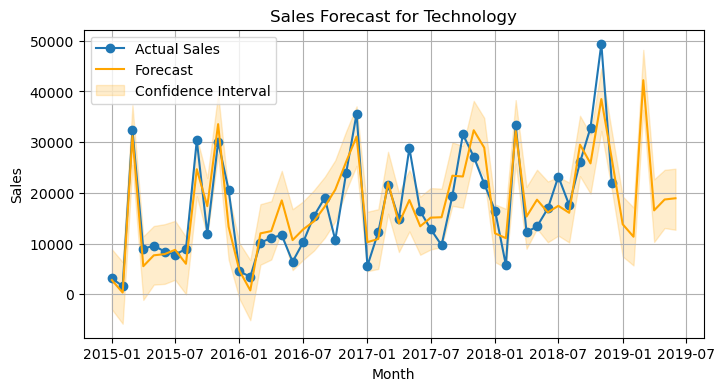

In [25]:
    plt.figure(figsize=(8, 4))
    plt.plot(ts["ds"], ts["y"], label="Actual Sales", marker='o')
    plt.plot(forecast["ds"], forecast["yhat"], label="Forecast", color='orange')
    plt.fill_between(forecast["ds"], forecast["yhat_lower"], forecast["yhat_upper"],
                     color='orange', alpha=0.2, label="Confidence Interval")
    plt.title(f"Sales Forecast for {category}")
    plt.xlabel("Month")
    plt.ylabel("Sales")
    plt.legend()
    plt.grid(True)
    plt.show()

In [27]:
final_forecast = pd.concat(all_forecasts, ignore_index=True)
final_forecast.to_csv("forecast_by_category.csv", index=False)